![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [6]:
df.shape

(541462, 3)

<Axes: >

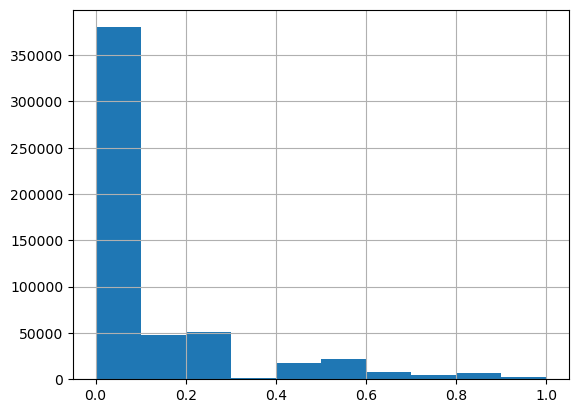

In [7]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [8]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [9]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1

stop_words = set(stopwords.words('english'))

# Crear una instancia de CountVectorizer
vectorizer = CountVectorizer(stop_words=list(stop_words))

# Ajustar y transformar los comentarios
X_train_countv = vectorizer.fit_transform(X_train)
X_test_countv = vectorizer.transform(X_test)

# Entrenar un modelo de bosque aleatorio
model = xgb.XGBRegressor(njobs=-1) # tree_method='gpu_hist'
model.fit(X_train_countv, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_countv)
mse_countv = mean_squared_error(y_test, y_pred)  
print('MSE:', mse_countv)

MSE: 0.02201025405564129


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2
# Definir la lista de stopwords
stop_words = set(stopwords.words('english'))

# Crear un objeto CountVectorizer con n-gramas de tamaño 1-2 en lugar de 1-3
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words=list(stop_words))

# Ajustar y transformar los comentarios
X_train_countvtrig = vectorizer.fit_transform(X_train)
X_test_countvtrig = vectorizer.transform(X_test)

# Reducir la dimensionalidad con PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=100)  # Reducir a 100 componentes
# X_train_countvtrig_pca = pca.fit_transform(X_train_countvtrig.toarray())
# X_test_countvtrig_pca = pca.transform(X_test_countvtrig.toarray())

# Entrenar un modelo de bosque aleatorio con hiperparámetros controlados
model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, n_jobs=-1)
model.fit(X_train_countvtrig, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_countvtrig)
mse_countvtrig = mean_squared_error(y_test, y_pred)
print('MSE:', mse_countvtrig)

MSE: 0.025561189125383188


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

## Celda 3
Según la página de Scikit-learn, la función TfidfVectorizer es una herramienta o medida estadística que evalúa la importancia de una palabra en un texto en relación a un conjunto de textos.

Esta función se divide en dos partes:

1. TF se refiere a Term Frequency, que se encarga de medir la frecuencia con la que cada palabra aparece en un texto en comparación a la cantidad total de palabras de éste. Entre mayor sea la frecuencia, mayor será el puntaje TF para una palabra específica.

2. IDF se refiere a Inverse Document Frequency, que se encarga de medir la frecuencia con la que cada palabra aparece a través de todos los textos del conjunto. Entre mayor sea la frecuencia, mayor será el puntaje IDF para una palabra específica.

En conjunto, la función TfidfVectorizer combina ambos valores y se asignan a una matriz en la que cada fila es un texto y cada columna es una palabra de éste. De este modo, cada palabra tendrá un peso ponderado por TD-IDF que representará su importancia y será útil a la hora de clasificar y agrupar textos.

Por otro lado, la función CountVectorizer es muy parecida en cuanto a la primera parte de TfidfVectorizer. Sin embargo, esta función no considera la importancia relativa de las palabras en un texto con respecto a otros textos. Es decir, la función construye una matriz de textos y palabras con pesos de importancia relativos al mismo texto, ignorando la importancia global de las palabras.

Por estas razones, la función TfidfVectorizer puede ser mejor para clasificar textos, pues ésta considera la importancia relativa de las palabras y reduce el impacto de palabras muy frecuentes que pueden no ser informativas al ser muy persistentes a través de todos los textos (como conectores). No obstante, TfidfVectorizer puede tener problemas si el conjunto de textos es muy reducido ya que la distribución de las palabras no será representativa, lo que puede causar valores IDF imprecisos. Adicionalmente, teniendo en cuenta que TfidfVectorizer le da menos peso a palabras con alta frecuencia absoluta, se puede perder información valiosa a cambio de considerar palabras con mayor rareza. Es decir, en casos en los que se desea dar más importancia a la frecuencia absoluta de las palabras, quizás sea más conveniente usar CountVectorizer. Finalmente, TfidfVectorizer es una función más compleja que CountVectorizer, por lo que requiere una optimización y calibración más cuidadosa para obtener los resultados deseados.


Fuentes: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html, https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 4
# Crear el vectorizador TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words=list(stop_words))

# Aplicar el vectorizador a los comentarios de entrenamiento y test
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Crear el modelo de regresión y entrenarlo
model_tfidf = xgb.XGBRegressor(njobs=-1) # tree_method='gpu_hist'
model_tfidf.fit(X_train_tfidf, y_train)

# Realizar predicciones en los datos de entrenamiento y test
y_pred_test_tfidf = model_tfidf.predict(X_test_tfidf)

# Calcular el MSE en los datos de entrenamiento y test
mse_tfidfvectorizer = mean_squared_error(y_test, y_pred_test_tfidf)

# Imprimir los resultados
print("MSE:", mse_tfidfvectorizer)

MSE: 0.02046005207953327


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

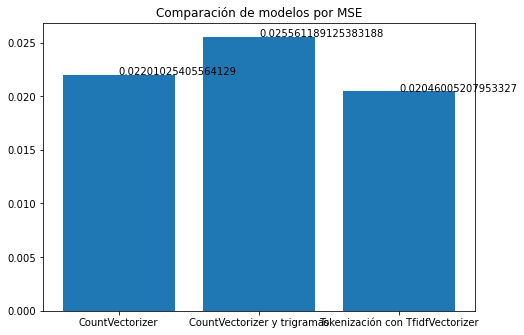

In [5]:
# Celda 5
##Comparación de MSE
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos por MSE")
ejeX = ['CountVectorizer','CountVectorizer y trigramas' ,'Tokenización con TfidfVectorizer']
ejeY = [mse_countv,mse_countvtrig,mse_tfidfvectorizer]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Como se puede ver, el modelo de Tokenización con CountVectorizer y trigramas tiene un mejor desempeño, mientras que Tokenización con TfidfVectorizer tiene el menor desempeño. Esto puede deberse a que TfidfVectorizer excluye palabras muy frecuentes que pueden ser relevantes para clasificar los comentarios.